In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the CSV file
df_data = pd.read_csv('36_TrainingData/L1_Train.csv')
df_data.describe()
#df_data.hist(alpha=0.6,layout=(3,3), figsize=(12, 8), bins=10) 
#plt.tight_layout()
#plt.show()



,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,101673.0,101673.000000,101673.000000,101673.000000,101673.000000,101673.000000,101673.000000
mean,1.0,0.297305,1008.546454,30.261133,73.025531,25773.275297,279.332067
std,0.0,0.783864,55.869739,9.809827,25.826234,29399.684979,479.481327
min,1.0,0.000000,958.150000,2.000000,18.900000,20.000000,0.000000
25%,1.0,0.000000,1003.480000,22.500000,48.300000,4067.500000,3.880000
50%,1.0,0.000000,1007.350000,29.000000,75.900000,13659.170000,39.280000
75%,1.0,0.000000,1013.070000,37.800000,100.000000,36855.700000,279.810000
max,1.0,8.880000,9014.550000,61.800000,300.000000,117758.200000,2598.450000


<Axes: xlabel='Power(mW)', ylabel='Count'>

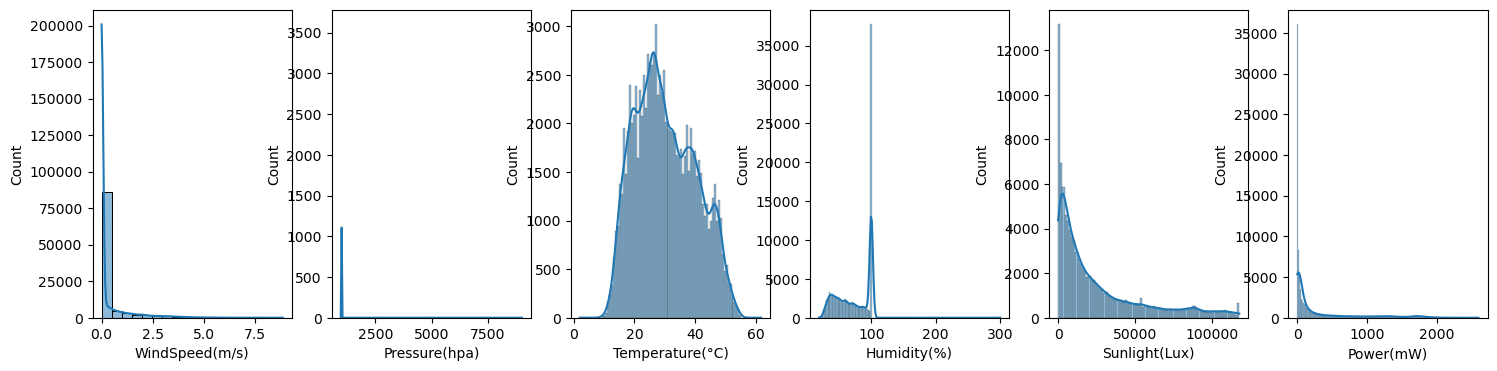

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=6)
fig.set_size_inches(18, 4)
sns.histplot(df_data["WindSpeed(m/s)"][:], ax=axes[0], kde=True)
sns.histplot(df_data["Pressure(hpa)"][:], ax=axes[1], kde=True)
sns.histplot(df_data["Temperature(°C)"][:], ax=axes[2], kde=True)
sns.histplot(df_data["Humidity(%)"][:], ax=axes[3], kde=True)
sns.histplot(df_data["Sunlight(Lux)"][:], ax=axes[4], kde=True)
sns.histplot(df_data["Power(mW)"][:], ax=axes[5], kde=True)


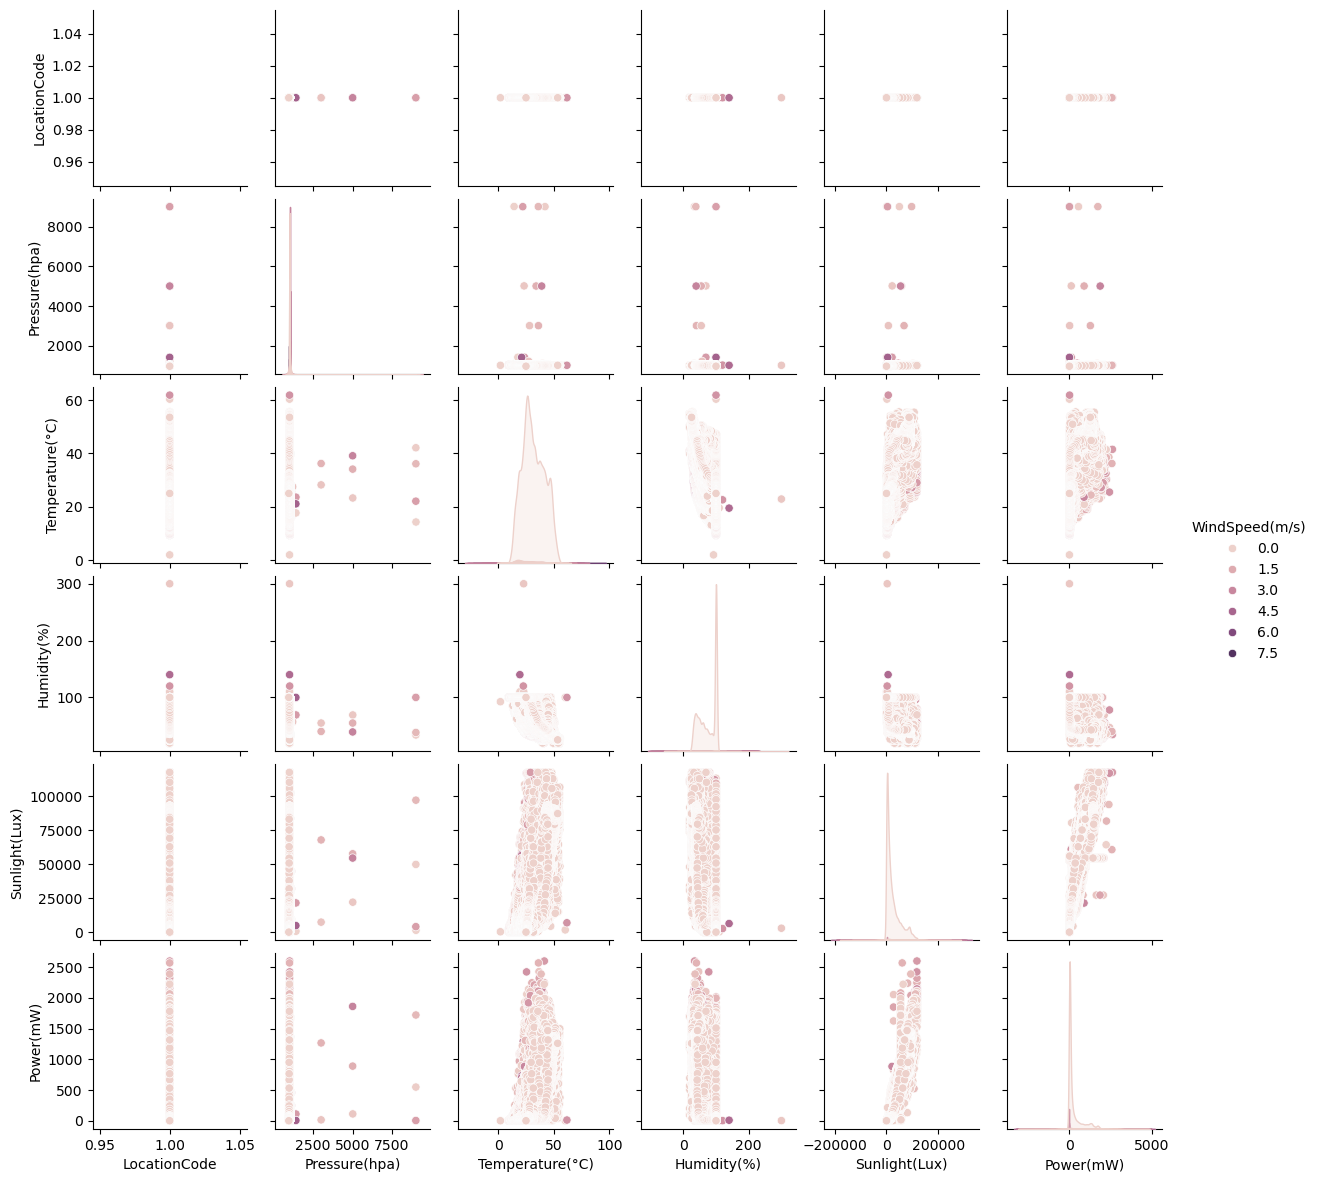

In [3]:
sns.pairplot(df_data, hue="WindSpeed(m/s)", height=2, diag_kind="kde")

<Axes: >

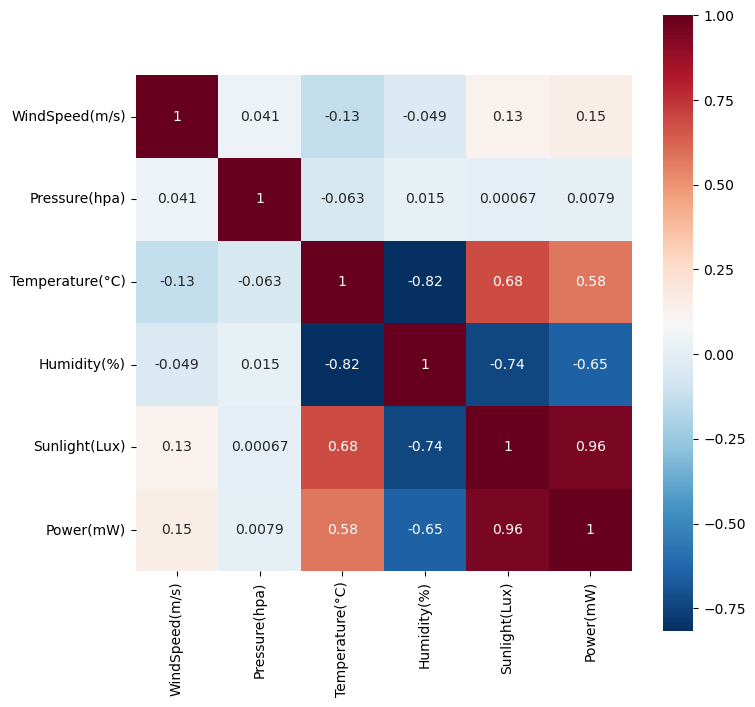

In [4]:
# correlation 計算
corr = df_data[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

<Axes: xlabel='WindSpeed(m/s)', ylabel='Power(mW)'>

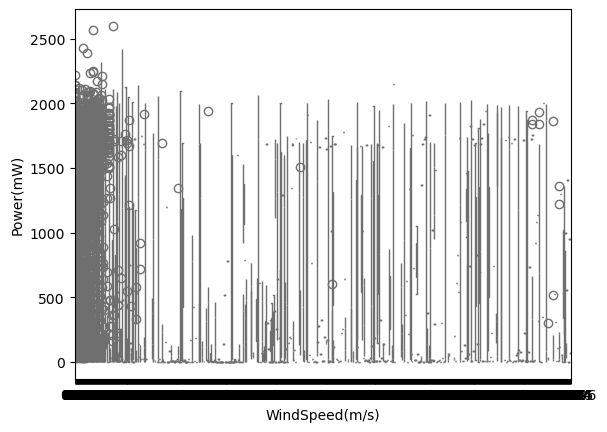

In [13]:
sns.boxplot(x='WindSpeed(m/s)', y='Power(mW)', data=df_data,color='skyblue',saturation=0.5)